In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    
%matplotlib inline 

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Загрузка и объединение датасетов

In [ ]:
df = pd.read_csv('https://github.com/nkozemaslova/Data_2022/releases/download/data3/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
df2 = pd.read_csv('https://github.com/nkozemaslova/Data_2022/releases/download/data4/spotify_dataset.csv', 
                         skiprows=1,
                         names=['user_id', 'artistname', 'trackname', 'playlistname'],
                         on_bad_lines='skip')

In [ ]:
# Переименовали колонку "artistname" во втором датасете на "artist_name"
df2 = df2.rename(columns={'artistname': 'artist_name'})

# Переименовали колнку "trackname" во втором датасете на "track_name"
df2 = df2.rename(columns={'trackname': 'track_name'})

In [ ]:
#размер первого датасета
df.shape

(232725, 18)

In [ ]:
#размер второго датасета
df2.shape

(12901979, 4)

In [ ]:
#объединенный датасет
data = pd.merge(df, df2, on=['artist_name', 'track_name'], how='inner')

In [ ]:
#размер датасета
data.shape

(6208521, 20)

## EDA

Еще добавим информацию с прошлого файла EDA (с визуализациями)

In [ ]:
#Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208521 entries, 0 to 6208520
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genre             object 
 1   artist_name       object 
 2   track_name        object 
 3   track_id          object 
 4   popularity        int64  
 5   acousticness      float64
 6   danceability      float64
 7   duration_ms       int64  
 8   energy            float64
 9   instrumentalness  float64
 10  key               object 
 11  liveness          float64
 12  loudness          float64
 13  mode              object 
 14  speechiness       float64
 15  tempo             float64
 16  time_signature    object 
 17  valence           float64
 18  user_id           object 
 19  playlistname      object 
dtypes: float64(9), int64(2), object(9)
memory usage: 994.7+ MB


In [ ]:
pd.options.display.float_format = "{:.3f}".format #приводим данные в удобный формат

In [ ]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000,6208521.000
mean,59.298,0.197,0.575,243832.400,0.684,0.080,0.192,-7.247,0.080,121.071,0.514
std,11.853,0.265,0.155,68271.196,0.209,0.212,0.155,3.658,0.092,28.367,0.240
min,0.000,0.000,0.057,21707.000,0.000,0.000,0.010,-47.669,0.022,31.689,0.000
25%,52.000,0.009,0.472,204707.000,0.553,0.000,0.094,-8.836,0.034,99.354,0.324
50%,60.000,0.064,0.579,234493.000,0.724,0.000,0.129,-6.383,0.045,119.994,0.515
75%,68.000,0.288,0.684,271107.000,0.849,0.008,0.250,-4.788,0.081,138.077,0.705
max,86.000,0.996,0.987,3815787.000,0.999,0.994,1.000,1.949,0.965,242.903,1.000


In [ ]:
data.describe(include = 'object')

,genre,artist_name,track_name,track_id,key,mode,time_signature,user_id,playlistname
count,6208521,6208521,6208521,6208521,6208521,6208521,6208521,6208521,6208500
unique,27,7940,55660,64337,12,2,5,15095,94826
top,Rock,Radiohead,Little Talks,3a2tuvXCHbW5nuUckuHkKT,C,Major,4/4,4398de6902abde3351347b048fcdc287,Starred
freq,879715,60622,11275,11275,754916,4128968,5806959,18778,744176


In [ ]:
data.isnull().sum()

genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
user_id              0
playlistname        21
dtype: int64

In [ ]:
#Поиск дубликатов:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
#количество уникальных пользователей в датасете
len(data.user_id.unique())

15095

In [ ]:
# количество плейлистов у каждого пользователя
playlist_counts = data.groupby('user_id')['playlistname'].nunique()

playlist_counts_table = pd.DataFrame({'User ID': playlist_counts.index, 
                                      'Number of Unique Playlists': playlist_counts.values})
playlist_counts_table = playlist_counts_table.sort_values('Number of Unique Playlists', ascending=False)

playlist_counts_table.head()

,User ID,Number of Unique Playlists
7991,872a19d491f4357408551be6d7eea273,58
8135,894ad851a592af491ea4b160effd6380,50
13977,ed140fce438f59e6e07e5ee7bd726692,50
6137,66fa46ff4893738f06435a53e435e342,50
4855,51b37a008eed57cba997414a0953ad35,50


In [ ]:
# количество треков у каждого пользователя
track_counts = data.groupby('user_id')['track_name'].nunique()

track_counts_table = pd.DataFrame({'User ID': track_counts.index, 
                                      'Number of Unique Tracks': track_counts.values})
track_counts_table = track_counts_table.sort_values('Number of Unique Tracks', ascending=False)

track_counts_table.head()

,User ID,Number of Unique Tracks
4041,4398de6902abde3351347b048fcdc287,7645
9086,99deafd9b792af8e6a535483088faef2,4344
14784,fa849dabeb14a2800ad5130907fc5018,3868
7531,7ee2b92c5bcf6133b8132363e5bda960,3276
3089,340158ece93a38f707842348b231be45,3069


In [ ]:
#есть пользователи с минимальным количеством треков
track_counts_table.tail()

,User ID,Number of Unique Tracks
8160,89b02162397ce5d3203aee3cab0b93bb,1
8156,89a20bc516f1d4950bd43af9e9e9234c,1
5199,5741a187081662bb96e5c1826f3816de,1
6618,6f5e433cf428f1a4880f0ee6a47790a8,1
7603,80355c8515bcde2069832f4595dd9d55,1


In [ ]:
# количество 'лайков' у каждого трека
likes_counts = data.groupby('track_name')['user_id'].nunique()

likes_counts_table = pd.DataFrame({'Track name': likes_counts.index, 
                                      'Number of Likes': likes_counts.values})
likes_counts_table = likes_counts_table.sort_values('Number of Likes', ascending=False)

likes_counts_table.head()

,Track name,Number of Likes
19769,Home,2110
37122,Radioactive,1822
38670,Royals,1723
51741,Wake Me Up,1700
27173,Little Talks,1682


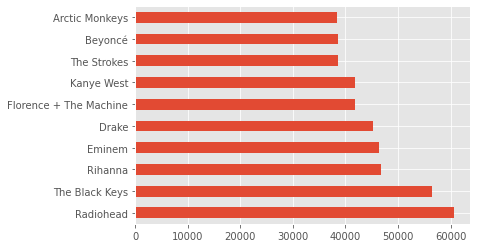

In [ ]:
# Top artists:
data['artist_name'].value_counts()[:10].plot(kind = 'barh');

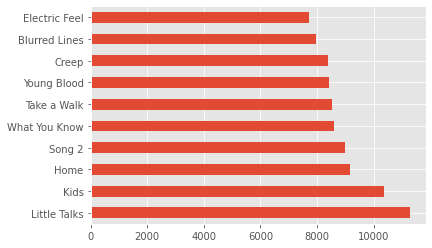

In [ ]:
# Top tracks
data['track_name'].value_counts()[:10].plot(kind = 'barh');

In [ ]:
#посмотреть данные по конкретному пользователю c идентификатором
user_data = data.groupby('user_id').get_group('6879b04def4c52a0d41e07b4f11136d6')
user_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,user_id,playlistname
205,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.036,0.761,219120,0.639,0.000,F,0.095,-7.577,Minor,0.054,164.088,4/4,0.922,6879b04def4c52a0d41e07b4f11136d6,Songs of 1997
531,Dance,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.036,0.761,219120,0.639,0.000,F,0.095,-7.577,Minor,0.054,164.088,4/4,0.922,6879b04def4c52a0d41e07b4f11136d6,Songs of 1997
857,Hip-Hop,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.036,0.761,219120,0.639,0.000,F,0.095,-7.577,Minor,0.054,164.088,4/4,0.922,6879b04def4c52a0d41e07b4f11136d6,Songs of 1997
1183,Pop,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.036,0.761,219120,0.639,0.000,F,0.095,-7.577,Minor,0.054,164.088,4/4,0.922,6879b04def4c52a0d41e07b4f11136d6,Songs of 1997
1509,Rap,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.036,0.761,219120,0.639,0.000,F,0.095,-7.577,Minor,0.054,164.088,4/4,0.922,6879b04def4c52a0d41e07b4f11136d6,Songs of 1997
